# Processing jet images

This Jupyter Notebook will process a jet image data set from an HDF5-file to a Pandas DataFrame ready for input to a network. It also includes a section for visualization and an optional truncation section. 

**Data description**:<br>
The data used in this example can be downloaded from: https://zenodo.org/record/269622#.X7JntC-HJAb. It is 2.2 GB in size. A full dataset description can be found in [arXiv:1701.05927]. It is an HDF5-file with the following fields:
- 'image' : array of dim (872666, 25, 25), contains the pixel intensities of each 25x25 image
- 'signal' : binary array to identify signal (1, i.e. W boson) vs background (0, i.e. QCD)
- 'jet_eta': eta coordinate per jet
- 'jet_phi': phi coordinate per jet
- 'jet_mass': mass per jet
- 'jet_pt': transverse momentum per jet
- 'jet_delta_R': distance between leading and subleading subjets if 2 subjets present, else 0
- 'tau_1', 'tau_2', 'tau_3': substructure variables per jet (a.k.a. n-subjettiness, where n=1, 2, 3)
- 'tau_21': tau2/tau1 per jet
- 'tau_32': tau3/tau2 per jet

## Extracting a DataFrame from the HDF5-file

### Reading the HDF5-file

In this first cell we read the HDF5 file and create some variables to describe the dimensions.  

In [1]:
import h5py

path = '/Users/nallenallis/Documents/LTH/Exjobb/data/jet images/jet-images_Mass60-100_pT250-300_R1.25_Pix25.hdf5'
file = h5py.File(path,'r')

# Jet image
image = file['/image']

# Jet variables
signal = file['/signal']

m = file['/jet_mass']
pt = file['/jet_pt']
eta = file['/jet_eta']
phi = file['/jet_phi']
deltaR = file['/jet_delta_R']

tau_1 = file['/tau_1']
tau_2 = file['/tau_2']
tau_3 = file['/tau_3']
tau_21 = file['/tau_21']
tau_32 = file['/tau_32']

# Dimensions
nbr_images = image.shape[0]
nbr_variables = 11 
dim0 = image.shape[1] 
dim1 = image.shape[2]

### Creating the DataFrame

Now we want to make a DataFrame (which is essentially a table) out of this. We therefore need to reconstruct the data in a way that fits into a 2D matrix. Here, we chose to do that by having one row per image. Each column is either a pixel value (the first 625 columns) and the rest are jet variables. 

In [2]:
import numpy as np
import pandas as pd

# Reshaping the images from (872666,25,25) to (872666, 625)
image = np.array(image)
image_array = image.reshape((nbr_images,dim0*dim1))

# Creating a DataFrame for the images
pixels = [str(x) for x in range(dim0*dim1)] # Creates array ['0', '1', '2', ..., 'dim0*dim1']
df = pd.DataFrame(data = image_array, columns = pixels)

# Adding the jet variables to the DataFrame as columns
df['signal/background'] = signal
df['m'] = m
df['pt'] = pt
df['eta'] = pt
df['phi'] = phi

df['deltaR'] = deltaR
df['tau_1'] = tau_1
df['tau_2'] = tau_2
df['tau_3'] = tau_3
df['tau_21'] = tau_21
df['tau_32'] = tau_32

Let's now see what the DataFrame looks like. 

Note: Because the jet images are sparse, it looks like the first 625 columns are empty. There are non-zero values in there -- don't worry!

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,m,pt,eta,phi,deltaR,tau_1,tau_2,tau_3,tau_21,tau_32
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,95.136238,299.065826,299.065826,5.756136,0.480557,0.261164,0.090308,0.061694,0.345790,0.683156
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,81.271561,291.957397,291.957397,5.938481,0.528465,0.224727,0.045367,0.037747,0.201877,0.832040
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,76.364853,251.558395,251.558395,2.774098,0.637886,0.215769,0.035222,0.021038,0.163242,0.597300
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,85.025551,271.143646,271.143646,1.718446,0.584993,0.287663,0.082421,0.043091,0.286519,0.522817
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,88.171738,271.161774,271.161774,1.980324,0.570896,0.264234,0.084575,0.050248,0.320074,0.594131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872661,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,62.390602,276.787262,276.787262,1.087263,0.485026,0.157626,0.073184,0.059536,0.464288,0.813516
872662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,71.287521,279.257935,279.257935,2.916059,0.316350,0.193224,0.133345,0.095567,0.690105,0.716693
872663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,69.504410,270.761169,270.761169,5.907346,0.529384,0.193998,0.092544,0.055212,0.477036,0.596603
872664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,73.301918,283.313690,283.313690,4.523892,0.559829,0.166450,0.069363,0.051459,0.416717,0.741885


## Visualization

### Plotting a jet image

So what does the jet images we imported look like? In this section we choose to plot one (#5) of all of the jet images. This is for visualization purposes only.

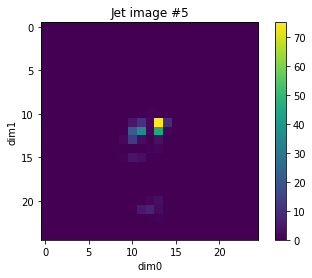

In [4]:
import matplotlib.pyplot as plt

# We choose to plot image #5 (out of 872 666)
n = 5

plt.figure()
plt.imshow(image[n,:,:])
plt.colorbar()
plt.title('Jet image #5')
plt.xlabel('dim0')
plt.ylabel('dim1')
plt.show()

### Plotting the jet variable distributions

Here we take a further look into the distributions of the jet variables. This is for visualization purpuses only and you can choose whichever variables you want. Here, we chose to plot just m, pt, phi and eta. 

First we want to separate signal from background.

In [5]:
# Signal
is_signal = df['signal/background'] == 1
df_signal = df[is_signal]

# Background
is_background = df['signal/background'] == 0
df_background = df[is_background]

Now we plot! The distributions of m, pt, phi and eta that are from 'signal jets' are red (left column) and those from 'background jets' are blue (right column)

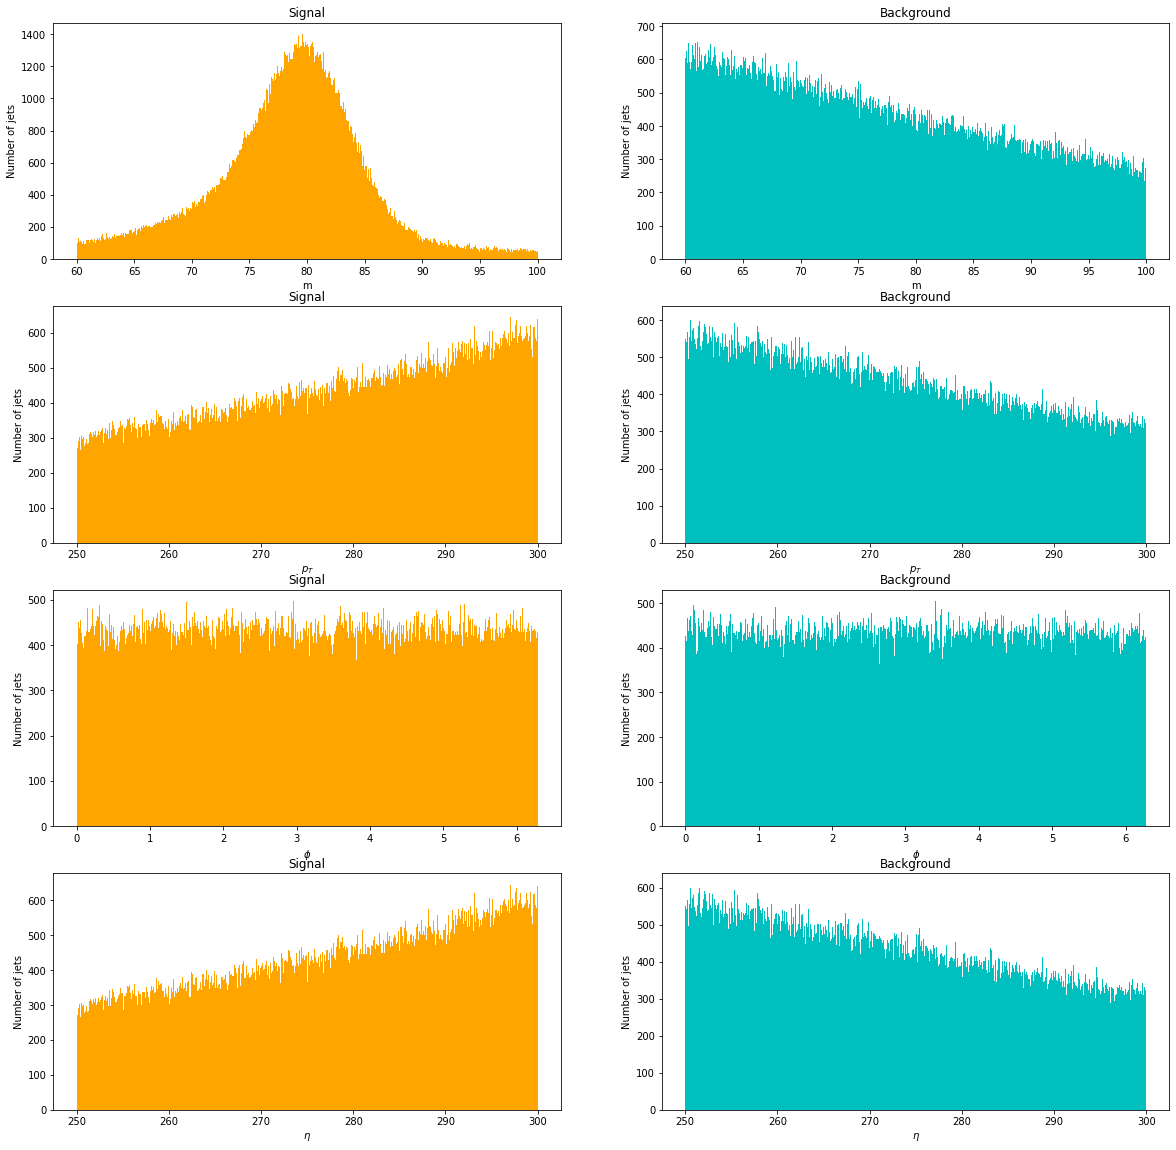

In [6]:
n_bins = 1000
x_labels = ['m','m','$p_T$','$p_T$','$\phi$','$\phi$','$\eta$','$\eta$']
titles = ['Signal','Background']

figure, axes = plt.subplots(nrows=4, ncols=2, figsize=(20,20))

# =========== m ===========
_,bin_edges,_ = axes[0,0].hist(df_signal['m'], color='orange', alpha = 1, bins=n_bins)
axes[0,1].hist(df_background['m'], color='c', alpha = 1, bins=bin_edges)

# =========== pt ===========
_,bin_edges,_ = axes[1,0].hist(df_signal['pt'], color='orange', alpha = 1, bins=n_bins)
axes[1,1].hist(df_background['pt'], color='c', alpha = 1, bins=bin_edges)

# =========== phi ===========
_,bin_edges,_ = axes[2,0].hist(df_signal['phi'], color='orange', alpha = 1, bins=n_bins)
axes[2,1].hist(df_background['phi'], color='c', alpha = 1, bins=bin_edges)

# =========== eta ===========
_,bin_edges,_ = axes[3,0].hist(df_signal['eta'], color='orange', alpha = 1, bins=n_bins)
axes[3,1].hist(df_background['eta'], color='c', alpha = 1, bins=bin_edges)

# Adding labels and titles to each subplot
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.set_xlabel(x_labels[idx])
    ax.set_title(titles[idx%2])
    ax.set_ylabel('Number of jets')

If you would like to save these figures to a .png then here is the cell to do that.

In [7]:
import os

save_dir = "plotOutput" # Change this to the path to wherever you want to save the figures
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
figure.savefig(os.path.join(save_dir,'distributions.png'))

## Pre-processing

### (Optional) Truncating the data

Because the dataset is so large (contains 872666 jet images), one optional step is to truncate the data and only include a limited set. This might be neccessary for your computer to handle the data.

In [10]:
nbr_images = 50000
df.truncate(before=0, after=nbr_images-1)

,0,1,2,3,4,5,6,7,8,9,...,m,pt,eta,phi,deltaR,tau_1,tau_2,tau_3,tau_21,tau_32
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,95.136238,299.065826,299.065826,5.756136,0.480557,0.261164,0.090308,0.061694,0.345790,0.683156
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,81.271561,291.957397,291.957397,5.938481,0.528465,0.224727,0.045367,0.037747,0.201877,0.832040
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,76.364853,251.558395,251.558395,2.774098,0.637886,0.215769,0.035222,0.021038,0.163242,0.597300
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,85.025551,271.143646,271.143646,1.718446,0.584993,0.287663,0.082421,0.043091,0.286519,0.522817
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,88.171738,271.161774,271.161774,1.980324,0.570896,0.264234,0.084575,0.050248,0.320074,0.594131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,79.455582,250.558533,250.558533,5.841528,0.516486,0.281795,0.148793,0.120029,0.528018,0.806685
49996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,75.540802,265.298645,265.298645,1.360684,0.365977,0.243252,0.170118,0.093872,0.699351,0.551804
49997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,61.758492,284.996735,284.996735,5.080204,0.466038,0.132975,0.067926,0.052938,0.510815,0.779358
49998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,69.689804,289.933319,289.933319,3.736380,0.475584,0.179565,0.117179,0.095890,0.652571,0.818318


### (Optional) Extracting the images

If you only need the images themselves and not the extra jet variables, then a good idea is to extract the images from the complete DataFrame.

In [8]:
df_img = df.iloc[:,0:625]
df_img_signal = df_signal.iloc[:,0:625]
df_img_bg = df_background.iloc[:,0:625]

## Saving DataFrame to .pkl file

Comment out those you're not interested in saving.

In [29]:
import sklearn

save_dir = '/Users/nallenallis/Documents/LTH/Exjobb/data'

# =========== Images + jet variables ===========
# Complete DataFrame (image and all jet variables) for both signal and background jets
df.to_pickle(os.path.join(save_dir,'jet_images_LAGAN_complete.pkl'))

# Complete DataFrame (image and all jet variables) for only signal jets
df_signal.to_pickle(os.path.join(save_dir,'jet_images_LAGAN_complete_signal.pkl'))

# Complete DataFrame (image and all jet variables) for only background jets
df_background.to_pickle(os.path.join(save_dir,'jet_images_LAGAN_complete_bg.pkl'))

# =========== Images ===========
# Only jet images for signal and background jets
df_img.to_pickle(os.path.join(save_dir,'jet_images_LAGAN_images.pkl'))

# Only jet images for signal jets
df_img_signal.to_pickle(os.path.join(save_dir,'jet_images_LAGAN_images_signal.pkl'))

# Only jet images for background jets
df_img_bg.to_pickle(os.path.join(save_dir,'jet_images_LAGAN_images_bg.pkl'))

# =========== Training, validation and testing ===========
# Splitting "Complete DataFrame (image and all jet variables) for only background jets" into three sets.
df_background=sklearn.utils.shuffle(df_background) # Shuffling

split1 = round(0.7*len(df_background))
split2 = round(0.2*len(df_background))

train = df_background[:split1] # 70 %
valid = df_background[split1:split1+split2] # 20 %
test = df_background[split1+split2:] # 10 %

train.to_pickle(os.path.join(save_dir,'jet_images_LAGAN_complete_bg_train.pkl'))
valid.to_pickle(os.path.join(save_dir,'jet_images_LAGAN_complete_bg_valid.pkl'))
test.to_pickle(os.path.join(save_dir,'jet_images_LAGAN_complete_bg_test.pkl'))

# Splitting "Only jet images for background jets" into three sets.
df_img_bg=sklearn.utils.shuffle(df_img_bg) 

split1 = round(0.7*len(df_img_bg))
split2 = round(0.2*len(df_img_bg))

train = df_img_bg[:split1] # 70 %
valid = df_img_bg[split1:split1+split2] # 20 %
test = df_img_bg[split1+split2:] # 10 %

train.to_pickle(os.path.join(save_dir,'jet_images_LAGAN_images_bg_train.pkl'))
valid.to_pickle(os.path.join(save_dir,'jet_images_LAGAN_images_bg_valid.pkl'))
test.to_pickle(os.path.join(save_dir,'jet_images_LAGAN_images_bg_test.pkl'))

NameError: name 'sklearn' is not defined

In [28]:
df_background_saved = df_background
df_img_bg_saved = df_img_bg